In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Q1.
### Fusible interlinings are being used with increasing frequency to support outer fabrics and improve the shape and drape of various pieces of clothing. The accompanying data on extensibility (%) at 100g/cm for both high quality (1, H) and poor quality (2, P) is given.
#### a. Create normal probability plots for both samples to assess normality.


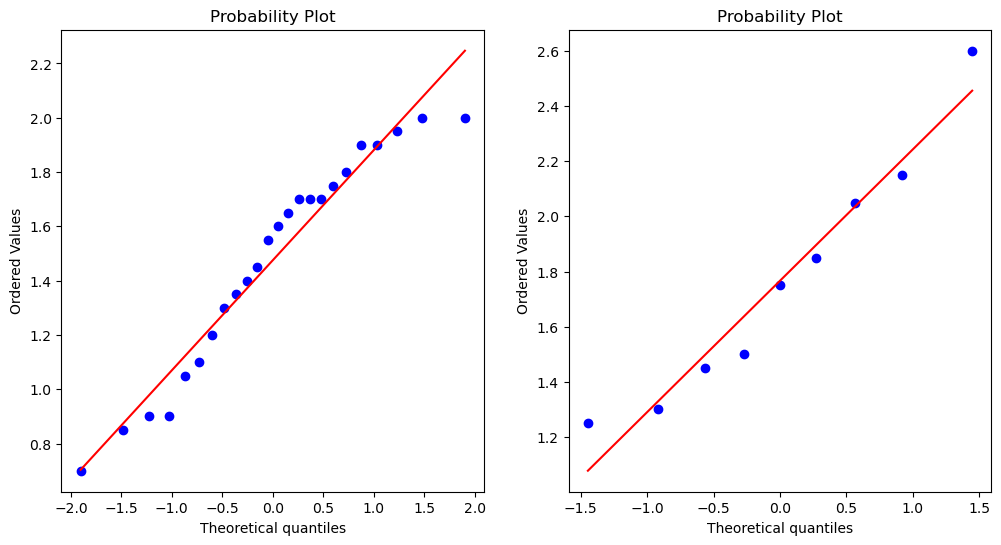

In [2]:
data = pd.read_excel("HW8 Datasets.xlsx")
data_h = data.loc[data.Quality == 'H']
data_p = data.loc[data.Quality == 'P']
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("High Quality")
stats.probplot(data_h['Extensibility (%)'], dist="norm", plot=plt)

plt.subplot(122)
plt.title("Poor Quality")
stats.probplot(data_p['Extensibility (%)'], dist="norm", plot=plt)
plt.show()
print("")

### Based on the graph above both seems to be normal

#### b. Test to see if the means are equal vs. 𝐻1: 𝜇2 ≠ 𝜇1 using 𝛼 = 0.05. Assume equal variances (include hypotheses, test statistic, p-value, decision, and conclusion).


$$
H_0 : \mu_1 = \mu_2
\\
H_1 :  \mu_1 \neq \mu_2
$$
We do not know sigma so we should use T test statistic, but since we assume equal variances 
$$
Degree\ of\ freedom = n_1 + n_2 - 2 = 9 + 24 - 2 = 31
$$

In [37]:
import numpy as np
from scipy import stats

# Given data
data_high = [1.20, 0.90, 0.70, 1.05, 1.70, 1.65, 1.10, 0.90, 1.70, 1.90, 1.35, 1.95, 1.45, 1.80, 1.40, 1.30, 1.90, 1.55, 0.85, 2.00, 1.70, 1.60, 1.75, 2.00]
data_poor = [1.85, 1.50, 1.25, 2.15, 1.75, 1.30, 1.45, 2.60, 2.05]

# Calculating the means and standard deviations
x1_bar = np.mean(data_high)
x2_bar = np.mean(data_poor)
s1 = np.std(data_high, ddof=1)
s2 = np.std(data_poor, ddof=1)
n1 = len(data_high)
n2 = len(data_poor)

# Calculating the pooled standard deviation
sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# Calculating the test statistic
t_statistic = (x2_bar - x1_bar) / (sp * np.sqrt(1/n1 + 1/n2))

# Calculating the p-value for two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n1+n2-2))

# Calculating the critical t-value for alpha=0.05 and df=n1+n2-2
t_critical = stats.t.ppf(0.975, df=n1+n2-2)

# Calculating the margin of error
margin_of_error = t_critical * sp * np.sqrt(1/n1 + 1/n2)

# Calculating the 95% confidence interval for the mean difference
confidence_interval = (x2_bar - x1_bar - margin_of_error, x2_bar - x1_bar + margin_of_error)

confidence_interval



(-0.03514284049799293, 0.6184761738313265)

In [42]:
margin_of_error

0.3268095071646597

In [22]:
np.sqrt(1/n1 + 1/n2)

0.3908679799852858

In [11]:
s_2 = np.std(data_h["Extensibility (%)"], ddof=1)
n_2 = len(data_h)
xbar_2 = np.mean(data_h["Extensibility (%)"])
s_1 = np.std(data_p["Extensibility (%)"], ddof=1)
n_1 = len(data_p)
xbar_1 = np.mean(data_p["Extensibility (%)"])
print(n_1, s_1, xbar_1)
print(n_2, s_2, xbar_2)

9 0.44511234536912136 1.7666666666666666
24 0.39699961669021033 1.4749999999999999


$$
\sigma \ is \ unknow \ => \\ 
T_0 = \frac{\bar{x_2} - \bar{x_1}}{s_p * \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} \\ 
\\ 
s_p^2 = \frac{(n_1-1)*s_1^2 + (n_2 - 1) * s_2^2}{n_1 + n_2 - 2} \\ 
\\ 
s_p = \frac{8*0.4197^2 + 23*0.3886^2}{31} = \frac{12.2954}{31} = 0.4100
\\ 
\sqrt{\frac{1}{n_1}+\frac{1}{n_2}} = \sqrt{\frac{1}{9}+\frac{1}{24}} = 0.3908
\\
T_0 = \frac{1.4750 - 1.7667}{0.411 * .3908} = -1.8202
$$

In [31]:
p_val = 2 * stats.t.cdf(-1.8202,31)
print(p_val)
print("We fail to Reject the hypothesis")

0.07839624044896547
We fail to Reject the hypothesis


### Based on the P_value > significance level, we do not have sufficient evidence that these high and poor quality are different

#### c. Create a 95% confidence interval for the mean difference and interpret.


In [33]:
stats.t.ppf(.975,31)

2.0395134463964077

$$
\mu_2 - \mu_1 \in (\bar{x_2}-\bar{x_1}) \pm t_{0,\frac{\alpha}{2}}*s_p*\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}
\\ 
error\ margin = t_{0,\frac{\alpha}{2}}*s_p*\sqrt{\frac{1}{n_1}+\frac{1}{n_2}} = 2.0395 * .4100 * .3909 = .3268
\\
\mu_2 - \mu_1 \in 1.7647 - 1.4750  \pm 0.3268
\\
\mu_2 - \mu_1 \in (-.0371,.6165)
$$

#### d. Do you get the same answers for parts b and c? Explain

### AS 0 is in the 95% confidence interval we can say there is possibility that there is no significant difference so B & C are consistent here

## Q2.
### Attached are the Brinell hardness values obtained for samples of two magnesium alloys before testing. First decide whether or not to use the pooled standard deviation, justify your answer with a plot. Assume that the populations are normal. Use 𝛼 = 0.05 to test the null hypothesis 𝜇2 − 𝜇1 = 0 against the alternative hypothesis 𝜇2 − 𝜇1 > 0 (include hypotheses, test statistic, p-value, decision, and conclusion).

In [47]:
df = pd.read_excel("HW8 Datasets.xlsx",sheet_name='Hardness')
df_all1 = df.loc[df.Alloy == 1]
df_all2 = df.loc[df.Alloy == 2]

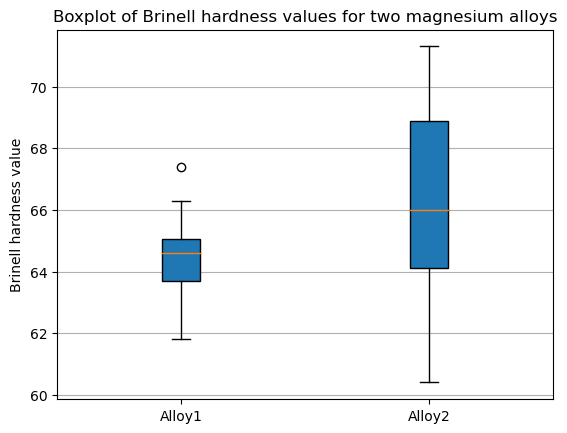

In [50]:
import matplotlib.pyplot as plt

# Plotting the boxplots for Alloy1 and Alloy2
plt.boxplot([df_all1['Hardness'], df_all2['Hardness']], vert=True, patch_artist=True, labels=["Alloy1", "Alloy2"])
plt.title('Boxplot of Brinell hardness values for two magnesium alloys')
plt.ylabel('Brinell hardness value')
plt.grid(axis='y')
plt.show()


### as the variance seems to be different from the box plot above we can not have the same variance assumption and we have:

In [51]:
xbar2 = np.mean(df_all2['Hardness'])
xbar1 = np.mean(df_all1['Hardness'])

s2 = np.std(df_all2['Hardness'],ddof=1)
s1 = np.std(df_all1['Hardness'],ddof=1)

n2 = len(df_all2['Hardness'])
n1 = len(df_all1['Hardness'])

t0 = (xbar2-xbar1)/np.sqrt(s2**2/n2 + s1**2/n1)

v = (s2**2/n2 + s1**2/n1)**2 / (((s2**2/n2)**2)/(n2-1) + ((s1**2/n1)**2)/(n1-1))

$$
t_0 = \frac{\bar{x_2} - \bar{x_1}}{\sqrt{\frac{s2^2}{n2}}}
$$

In [52]:
print(t0, v)

1.4152222251071098 12.510861541152087


In [54]:
p_val = 1 - stats.t.cdf(1.4152,12.51)
print(p_val)

0.09070928552984525


### Since the p-value (0.0907) is greater than alpha=.05, we fail to reject the null hypothesis 
### so we fail to reject null hypothesis
#### we do not have enough evidence to suggest that the mean Brinell hardness value of Alloy2 is greater than that of Alloy1